<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Quantum_computing4/blob/main/Final_CC_AnaAlonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de librerías a utilizar

In [75]:
from keras import models
from keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.preprocessing import LabelEncoder

### Descarga y limpieza de datos

In [76]:
# Descarga de datos
data = pd.read_csv('Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [77]:
# Visualize and clean data
data = data.dropna()
data = data.drop('Id', axis=1)
data.shape

(150, 5)

In [78]:
data.loc[data['Species'] == 'Iris-setosa', 'Species'] = 0
data.loc[data['Species'] == 'Iris-virginica', 'Species'] = 1

In [79]:
x_data = data.drop('Species', axis=1)
print('X_data:', np.shape(x_data))
y_data = data['Species']
print('Y_data:', np.shape(y_data))

X_data: (150, 4)
Y_data: (150,)


Separamos los datos de entrenamiento y validación, comprobando sus dimensiones.

In [107]:
# Split the data into training and validation sets if needed
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

In [108]:
# Check the dimension of the sets
print('X_train:',np.shape(x_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(x_val))
print('y_test:',np.shape(y_val))

X_train: (135, 4)
y_train: (135,)
X_test: (15, 4)
y_test: (15,)


Codificamos las etiquetas para poder entrenar el  modelo.

In [109]:
y_train = [str(label) for label in y_train]
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

### Modelo clásico
Creación del modelo clásico con una capa densa de entrada con 4 neuronas y la de salida con función de activación 'sigmoid'.

In [117]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(4,)))
# model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Compilación y entrenamiento
Usando el optimizador 'rmsprop' y la función de pérdida 'binary crossentropy', debido a que queremos sacar la clasificación binaria de las plantas, entrenamos nuestro modelo.

Con tan solo 5 épocas y un minilote de 16.

In [118]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train,
                    y_train_encoded,
                    epochs=5,
                    batch_size=16,
                     validation_data=(x_val, y_val_encoded))

Epoch 1/5
9/9 [==============================] - 1s 28ms/step - loss: 0.5746 - acc: 0.6741 - val_loss: 0.4830 - val_acc: 0.6000
Epoch 2/5
9/9 [==============================] - 0s 5ms/step - loss: 0.4914 - acc: 0.6741 - val_loss: 0.4149 - val_acc: 0.6000
Epoch 3/5
9/9 [==============================] - 0s 5ms/step - loss: 0.4314 - acc: 0.6667 - val_loss: 0.3535 - val_acc: 0.6000
Epoch 4/5
9/9 [==============================] - 0s 5ms/step - loss: 0.3766 - acc: 0.6667 - val_loss: 0.2986 - val_acc: 0.6000
Epoch 5/5
9/9 [==============================] - 0s 5ms/step - loss: 0.3269 - acc: 0.6593 - val_loss: 0.2501 - val_acc: 0.4000


Evaluamos el modelo y sacamos las métricas para ver cómo se comporta.

Podemos observar que el modelo no es muy bueno, ya que la precisión es tan solo del 40%. Se han cambiado los parámetros e hiperparámetros para llegar a esta precisión, ya que inicialmente, la precisión era del 23%.

In [112]:
# Test, Loss and accuracy
loss_and_metrics = model.evaluate(x_val, y_val_encoded)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

1/1 [==============================] - 0s 47ms/step - loss: 0.7581 - acc: 0.4000
Loss =  0.7580965757369995
Accuracy =  0.4000000059604645


### Graficas de pérdida y precisión
Se ve cómo se modifica la pérdida y se incrementa la precisión según aumenta el número de épocas de entrenamiento.

In [121]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

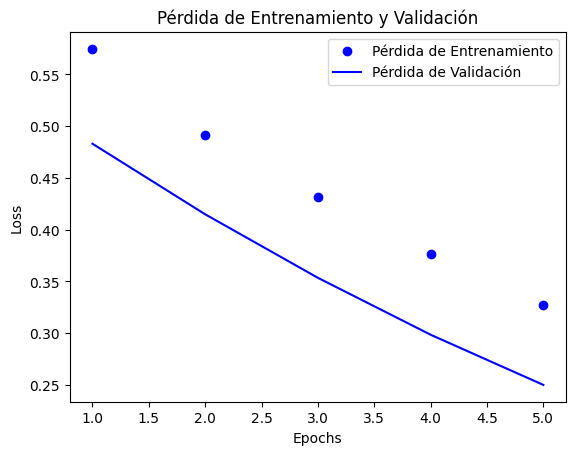

In [123]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

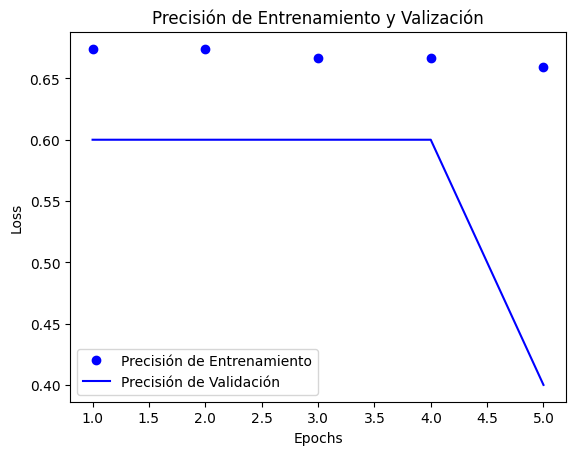

In [124]:
plt.clf()   # Limpia la figura
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()